# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

#### Eduardo Kenji
##### RM94180

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression


sns.set_style("darkgrid")

In [2]:
df_carro = pd.read_csv('carros.csv')
df_carro = df_carro.dropna()
df_carro

Brand     Price       Body  Mileage/1000  EngineV Engine Type  \
0               BMW    4200.0      sedan           277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van           427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan           358      5.0         Gas   
3              Audi   23000.0  crossover           240      4.2      Petrol   
4            Toyota   18300.0  crossover           120      2.0      Petrol   
...             ...       ...        ...           ...      ...         ...   
4339         Toyota   17900.0      sedan            35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan             9      3.0      Diesel   
4341            BMW    6500.0      sedan             1      3.5      Petrol   
4342            BMW    8000.0      sedan           194      2.0      Petrol   
4344     Volkswagen   13500.0        van           124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4339          yes  2014            Corolla  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4344          yes  2013  T5 (Transporter)   

[4025 rows x 9 columns]

### Respostas 1

###### Todos os dados: 39.105 
###### Após retirar os dados faltantes: 36.225 
###### Quantidade de atributos: 9 
###### Existem 2.880 dados faltantes. 
###### Tipos de dados: float, int, string. 

#### 2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [3]:
df_carro.columns

Index(['Brand', 'Price', 'Body', 'Mileage/1000', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [4]:
df_carro['Mileage/1000'] = df_carro['Mileage/1000'] * 1600

df_carro = df_carro.rename(
        columns=({'Brand': 'Marca', 'Price': 'Preço', 'Body': 'Carroceria', 
                  'EngineV': 'Cilindros/1000', 'Engine Type': 'Combustível',
                  'Registration': 'Documentação', 'Year': 'Ano', 'Model': 'Modelo', 'Mileage/1000': 'Quilometragem'}))


df_carro.head(15)

Marca     Preço Carroceria  Quilometragem  Cilindros/1000  \
0             BMW    4200.0      sedan         443200            2.00   
1   Mercedes-Benz    7900.0        van         683200            2.90   
2   Mercedes-Benz   13300.0      sedan         572800            5.00   
3            Audi   23000.0  crossover         384000            4.20   
4          Toyota   18300.0  crossover         192000            2.00   
5   Mercedes-Benz  199999.0  crossover              0            5.50   
6             BMW    6100.0      sedan         700800            2.00   
7            Audi   14200.0      vagon         320000            2.70   
8         Renault   10799.0      vagon         308800            1.50   
9      Volkswagen    1400.0      other         339200            1.80   
10        Renault   11950.0      vagon         283200            1.50   
11        Renault    2500.0      sedan         416000            1.79   
12           Audi    9500.0      vagon         264000            2.70   
13     Volkswagen   10500.0      sedan         160000            1.80   
14         Toyota   16000.0  crossover         400000            4.70   

   Combustível Documentação   Ano            Modelo  
0       Petrol          yes  1991               320  
1       Diesel          yes  1999      Sprinter 212  
2          Gas          yes  2003             S 500  
3       Petrol          yes  2007                Q7  
4       Petrol          yes  2011             Rav 4  
5       Petrol          yes  2016            GLS 63  
6          Gas          yes  1997               320  
7       Diesel          yes  2006                A6  
8       Diesel          yes  2012            Megane  
9          Gas           no  1999           Golf IV  
10      Diesel          yes  2011            Megane  
11      Petrol          yes  1994                19  
12         Gas          yes  2003        A6 Allroad  
13      Petrol          yes  2008         Passat B6  
14         Gas          yes  2001  Land Cruiser 100

## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [5]:
df_carro.describe().round(1)

Preço  Quilometragem  Cilindros/1000     Ano
count    4025.0         4025.0          4025.0  4025.0
mean    19552.3       261715.5             2.8  2006.4
std     25815.7       165431.5             4.9     6.7
min       600.0            0.0             0.6  1969.0
25%      6999.0       144000.0             1.8  2003.0
50%     11500.0       252800.0             2.2  2007.0
75%     21900.0       368000.0             3.0  2012.0
max    300000.0      1568000.0           100.0  2016.0

Text(0, 0.5, 'Combistível')

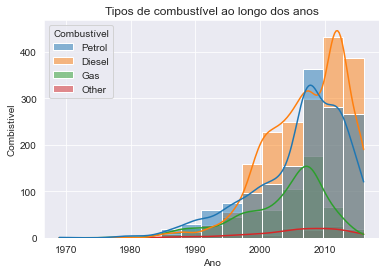

In [6]:
sns.histplot(df_carro, x='Ano', bins=15, kde=True,
             hue='Combustível').set(title='Tipos de combustível ao longo dos anos')

plt.ylabel('Combustível')

Text(0, 0.5, 'Carroceria')

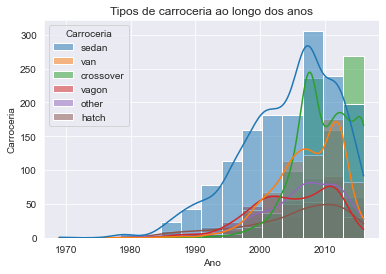

In [7]:
sns.histplot(df_carro, x='Ano', bins=15, kde=True,
             hue='Carroceria').set(title='Tipos de carroceria ao longo dos anos')

plt.ylabel('Carroceria')

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

#### Resposta 4: 
###### Modelo supervisionado, pois estamos ensinando a máquina os algoritimos para a identificação da informação


5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

#### Resposta 5: 
###### Técnica de regressão, pois a resposta deve ser numérica

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

#### Resposta 5.1:
#### Algoritmo 1: Regressao Linear


#### Resposta 5.2: 
#### Algoritmo 2: LinearSVR

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [8]:
### Renomeando as tabelas e fazendo o get_dummies para a regressão

df_carro.drop(['Documentação', 'Modelo'], axis='columns', inplace=True)
df_carro = pd.get_dummies(df_carro, columns=['Marca','Carroceria', 'Combustível'])
df_carro = df_carro.rename(
        columns=({'Carroceria_crossover': 'Crossover', 'Carroceria_hatch': 'Hatch',
                  'Carroceria_other':'Other', 'Carroceria_sedan': 'Sedan', 'Carroceria_vagon': 'Vagon',
                  'Carroceria_van': 'Van','Marca_Audi': 'Audi', 'Marca_Mercedes-Benz': 'Mercedes-Benz',
                  'Marca_Mitsubishi': 'Mitsubishi','Marca_Renault': 'Renault', 'Marca_Toyota': 'Toyota',
                  'Marca_Volkswagen': 'Volkswagen', 'Marca_BMW': 'BMW', 'Combustível_Diesel': 'Diesel',
                  'Combustível_Gas': 'Gas', 'Combustível_Other': 'Outro', 'Combustível_Petrol': 'Gasolina'}))
df_carro.dropna()

Preço  Quilometragem  Cilindros/1000   Ano  Audi  BMW  Mercedes-Benz  \
0       4200.0         443200             2.0  1991     0    1              0   
1       7900.0         683200             2.9  1999     0    0              1   
2      13300.0         572800             5.0  2003     0    0              1   
3      23000.0         384000             4.2  2007     1    0              0   
4      18300.0         192000             2.0  2011     0    0              0   
...        ...            ...             ...   ...   ...  ...            ...   
4339   17900.0          56000             1.6  2014     0    0              0   
4340  125000.0          14400             3.0  2014     0    0              1   
4341    6500.0           1600             3.5  1999     0    1              0   
4342    8000.0         310400             2.0  1985     0    1              0   
4344   13500.0         198400             2.0  2013     0    0              0   

      Mitsubishi  Renault  Toyota  ...  Crossover  Hatch  Other  Sedan  Vagon  \
0              0        0       0  ...          0      0      0      1      0   
1              0        0       0  ...          0      0      0      0      0   
2              0        0       0  ...          0      0      0      1      0   
3              0        0       0  ...          1      0      0      0      0   
4              0        0       1  ...          1      0      0      0      0   
...          ...      ...     ...  ...        ...    ...    ...    ...    ...   
4339           0        0       1  ...          0      0      0      1      0   
4340           0        0       0  ...          0      0      0      1      0   
4341           0        0       0  ...          0      0      0      1      0   
4342           0        0       0  ...          0      0      0      1      0   
4344           0        0       0  ...          0      0      0      0      0   

      Van  Diesel  Gas  Outro  Gasolina  
0       0       0    0      0         1  
1       1       1    0      0         0  
2       0       0    1      0         0  
3       0       0    0      0         1  
4       0       0    0      0         1  
...   ...     ...  ...    ...       ...  
4339    0       0    0      0         1  
4340    0       1    0      0         0  
4341    0       0    0      0         1  
4342    0       0    0      0         1  
4344    1       1    0      0         0  

[4025 rows x 21 columns]

In [9]:
#Sua resposta 

X = df_carro[['Quilometragem', 'Cilindros/1000', 'Ano', 'Audi', 'BMW',
       'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen',
       'Crossover', 'Hatch', 'Other', 'Sedan', 'Vagon', 'Van','Gasolina']]

y = df_carro[['Preço']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
linear = LinearRegression()

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)

In [10]:
linear.fit(X_train,y_train) 
y_predicoes = linear.predict(X_test) 

In [11]:
#Sua resposta aqui

MAE = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes)
print(f'MAE: ', MAE.round(2)) #Quanto maior o valor, pior.

##################################################

R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes)
print(f'R2: ', R2.round(2)) #O mais proximo de 1, melhor.

MAE:  10601.46
R2:  0.47


7.2 - Algoritmo 2:  (0,5)

In [12]:
#Sua resposta aqui
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regr = make_pipeline(LinearSVR(random_state=0))

regr.fit(X, y)

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linearsvr', LinearSVR(random_state=0))])

In [13]:
MAEv1 = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes)
print(f'MAE: ', MAEv1.round(2)) #Quanto maior o valor, pior.

##################################################

R2v1 = r2_score(y_true = y_test,      
              y_pred = y_predicoes)
print(f'R2: ', R2v1.round(2)) #O mais proximo de 1, melhor.

MAE:  20527.67
R2:  -0.52


In [14]:
#7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

print(f'Resposta: O algoritimo de regressão linear foi melhor segundo os dados gerados') 
    
print()
    
print(f'Dados Regressão Linear')
print(f'MAE', MAE.round(2))
print(f'R2', R2.round(2))

print()

# Contra os dados do LinearSVR que foram foram(): 
print(f'LinearSVR')
print(f'MAEv2:', MAEv1.round(2))
print(f'R2v2:', R2v1.round(2))


Resposta: O algoritimo de regressão linear foi melhor segundo os dados gerados

Dados Regressão Linear
MAE 10601.46
R2 0.47

LinearSVR
MAEv2: 20527.67
R2v2: -0.52


## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [15]:
#Sua resposta aqui

df_sedan = pd.DataFrame({})

for i in X.columns.tolist():
    if i == 'Quilometragem':
        df_sedan[i] = [172095]
    elif i == 'Ano':
        df_sedan[i] = [2005]
    elif i == 'Cilindros/1000':
        df_sedan[i] = [2.0]
    elif i == 'Volkswagen':
        df_sedan[i] = [1]
    elif i == 'Gasolina':
        df_sedan[i] = [1]
    elif i == 'Sedan':
        df_sedan[i] = [1]
    else:
        df_sedan[i] = [0] 
        
Preco = linear.predict(df_sedan)[0].round(1)
print(f' O preço do carro seria de: {Preco[0]}')

 O preço do carro seria de: 16195.8


In [16]:
df_sedan['Preço'] = Preco
df_sedan

Quilometragem  Cilindros/1000   Ano  Audi  BMW  Mercedes-Benz  Mitsubishi  \
0         172095             2.0  2005     0    0              0           0   

   Renault  Toyota  Volkswagen  Crossover  Hatch  Other  Sedan  Vagon  Van  \
0        0       0           1          0      0      0      1      0    0   

   Gasolina    Preço  
0         1  16195.8